In [1]:
import pandas as pd

file_path = r"X:\Study\Projects\ML-Basics-Project\data\madrid.h5"

dfs = []
with pd.HDFStore(file_path, mode='r') as store:
    for key in store.keys():
        temp_df = store[key]
        temp_df['station_id'] = key  # Keep track of station
        dfs.append(temp_df)

df = pd.concat(dfs, ignore_index=True)
print(df.head())


     CO       NO_2        NOx        O_3        PM10  PM25  SO_2 station_id  \
0  0.37  58.400002  87.150002  34.529999  105.000000   NaN  6.34  /28079001   
1  0.42  65.760002  93.830002  27.930000   69.750000   NaN  7.15  /28079001   
2  0.32  61.090000  88.089996  32.070000   56.220001   NaN  6.26  /28079001   
3  0.23  47.020000  62.930000  42.209999   50.689999   NaN  5.19  /28079001   
4  0.19  47.169998  62.630001  48.459999   49.490002   NaN  5.03  /28079001   

   NO  BEN  ...  PXY  TCH  TOL  CH4  id  name  address  lon  lat elevation  
0 NaN  NaN  ...  NaN  NaN  NaN  NaN NaN   NaN      NaN  NaN  NaN       NaN  
1 NaN  NaN  ...  NaN  NaN  NaN  NaN NaN   NaN      NaN  NaN  NaN       NaN  
2 NaN  NaN  ...  NaN  NaN  NaN  NaN NaN   NaN      NaN  NaN  NaN       NaN  
3 NaN  NaN  ...  NaN  NaN  NaN  NaN NaN   NaN      NaN  NaN  NaN       NaN  
4 NaN  NaN  ...  NaN  NaN  NaN  NaN NaN   NaN      NaN  NaN  NaN       NaN  

[5 rows x 24 columns]


In [2]:
df.shape

(3808248, 24)

In [3]:
df.isnull().sum()

CO            1157236
NO_2            21198
NOx           1431973
O_3            816516
PM10           946993
PM25          2991824
SO_2          1032288
station_id          0
NO            2275851
BEN           2766564
EBE           2806524
MXY           3492833
NMHC          2722936
OXY           3492553
PXY           3492664
TCH           2721807
TOL           2769319
CH4           3793398
id            3808224
name          3808224
address       3808224
lon           3808224
lat           3808224
elevation     3808224
dtype: int64

In [4]:
print("Before:", df.shape)
df_new = df.dropna(subset=["lat", "lon"])
print("After:", df_new.shape)

Before: (3808248, 24)
After: (24, 24)


In [5]:
df_air = df.drop(columns=['id','name','address','lon','lat','elevation',
           'OXY','PXY','TCH','TOL','CH4','PM25', 'NO', 'BEN', 'EBE', 'MXY', 'NMHC'])

In [6]:
print(df_air.shape)
df=df_air
df.head()

(3808248, 7)


,CO,NO_2,NOx,O_3,PM10,SO_2,station_id
0,0.37,58.400002,87.150002,34.529999,105.000000,6.34,/28079001
1,0.42,65.760002,93.830002,27.930000,69.750000,7.15,/28079001
2,0.32,61.090000,88.089996,32.070000,56.220001,6.26,/28079001
3,0.23,47.020000,62.930000,42.209999,50.689999,5.19,/28079001
4,0.19,47.169998,62.630001,48.459999,49.490002,5.03,/28079001


In [7]:
df.describe()

,CO,NO_2,NOx,O_3,PM10,SO_2
count,2.651012e+06,3.787050e+06,2.376275e+06,2.991732e+06,2.861255e+06,2.775960e+06
mean,5.503838e-01,5.047151e+01,1.093188e+02,3.982616e+01,2.893654e+01,1.065539e+01
std,5.354483e-01,3.455288e+01,1.102871e+02,3.039249e+01,2.594859e+01,9.121267e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.600000e-01,2.400000e+01,4.000000e+01,1.271000e+01,1.150000e+01,5.840000e+00
50%,4.000000e-01,4.400000e+01,7.615000e+01,3.486000e+01,2.149000e+01,8.150000e+00
75%,6.500000e-01,6.958000e+01,1.397000e+02,5.999000e+01,3.775000e+01,1.230000e+01
max,1.804000e+01,6.286000e+02,2.537000e+03,2.360000e+02,6.950000e+02,1.991000e+02


In [8]:
print(df.isnull().sum())
df.shape

CO            1157236
NO_2            21198
NOx           1431973
O_3            816516
PM10           946993
SO_2          1032288
station_id          0
dtype: int64


(3808248, 7)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

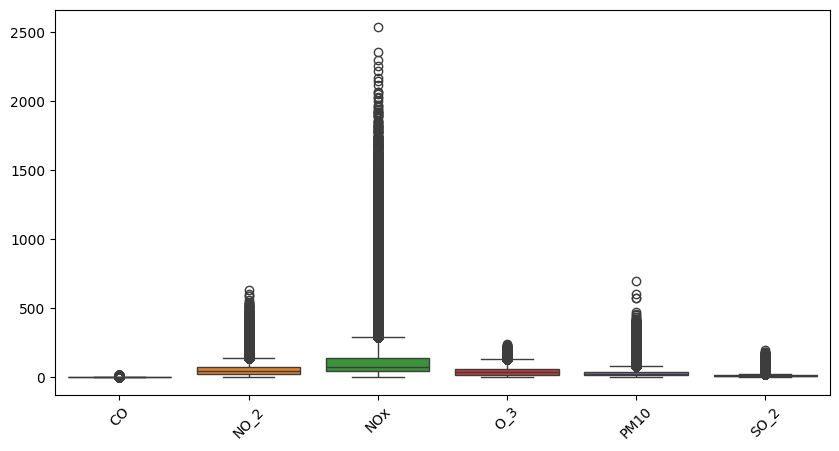

In [10]:
pollutant_cols = ['CO','NO_2','NOx','O_3','PM10','SO_2']
plt.figure(figsize=(10,5))
sns.boxplot(data=df[pollutant_cols])
plt.xticks(rotation=45)
plt.show

In [11]:
df = df[~(df[pollutant_cols] == 0).any(axis=1)]
(df == 0).sum()

CO            0
NO_2          0
NOx           0
O_3           0
PM10          0
SO_2          0
station_id    0
dtype: int64

In [ ]:
#outliers remove ke chakkkar mein pura data udd raha h . Thus , capped
def cap(df,col):
    q1 = df[col].quantile(0.20)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1 
    
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    
    df[col] = np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    return df

for col in pollutant_cols:
    df = cap(df,col)

#softening the effect of cap
for col in pollutant_cols:
    df[col]=np.log1p(df[col])

C:\Users\upman\AppData\Local\Temp\ipykernel_24756\1056796816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
C:\Users\upman\AppData\Local\Temp\ipykernel_24756\1056796816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
C:\Users\upman\AppData\Local\Temp\ipykernel_24756\1056796816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a co

<function matplotlib.pyplot.show(close=None, block=None)>

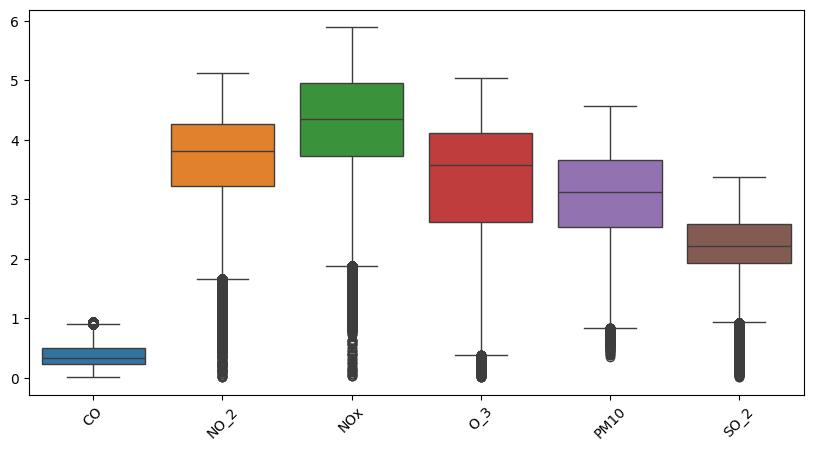

In [13]:
pollutant_cols = ['CO','NO_2','NOx','O_3','PM10','SO_2']
plt.figure(figsize=(10,5))
sns.boxplot(data=df[pollutant_cols])
plt.xticks(rotation=45)
plt.show

In [14]:
from scipy.stats import skew

skewness_value = skew(df[pollutant_cols].dropna())
print(skewness_value)
print(pollutant_cols)

[ 0.73929548 -0.80753944 -0.31471018 -0.42361998 -0.28144031  0.23187036]
['CO', 'NO_2', 'NOx', 'O_3', 'PM10', 'SO_2']


In [15]:
# If skewness |value| < 0.5 → data roughly symmetric
# 👉 use Mean imputation

# If skewness > 0.5 (right-skewed)
# 👉 use Median or log-transform + mean (median better, kyunki outliers ka effect kam hota hai)

# If skewness < -0.5 (left-skewed)
# 👉 use Median (again safer, since mean distort ho sakta hai)

df['CO'].fillna(df['CO'].median(), inplace=True)
df['NO_2'].fillna(df['NO_2'].median(), inplace=True)
df['NOx'].fillna(df['NOx'].mean(), inplace=True)
df['O_3'].fillna(df['O_3'].mean(), inplace=True)
df['PM10'].fillna(df['PM10'].mean(), inplace=True)
df['SO_2'].fillna(df['SO_2'].mean(), inplace=True)

C:\Users\upman\AppData\Local\Temp\ipykernel_24756\3070033132.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CO'].fillna(df['CO'].median(), inplace=True)
C:\Users\upman\AppData\Local\Temp\ipykernel_24756\3070033132.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CO'].fillna(df['CO'].median(), inplace=True)
C:\Users\upman\AppD

CO            0
NO_2          0
NOx           0
O_3           0
PM10          0
SO_2          0
station_id    0
dtype: int64
         CO      NO_2       NOx       O_3      PM10      SO_2 station_id
0  0.314811  4.084294  4.479040  3.570377  4.569543  1.993339  /28079001
1  0.350657  4.201104  4.552086  3.364879  4.259153  2.098018  /28079001
2  0.277632  4.128585  4.489647  3.498627  4.046904  1.982380  /28079001
3  0.207014  3.871618  4.157789  3.766072  3.945264  1.822935  /28079001
4  0.173953  3.874736  4.153085  3.901164  3.921775  1.796747  /28079001
(3801770, 7)


<function matplotlib.pyplot.show(close=None, block=None)>

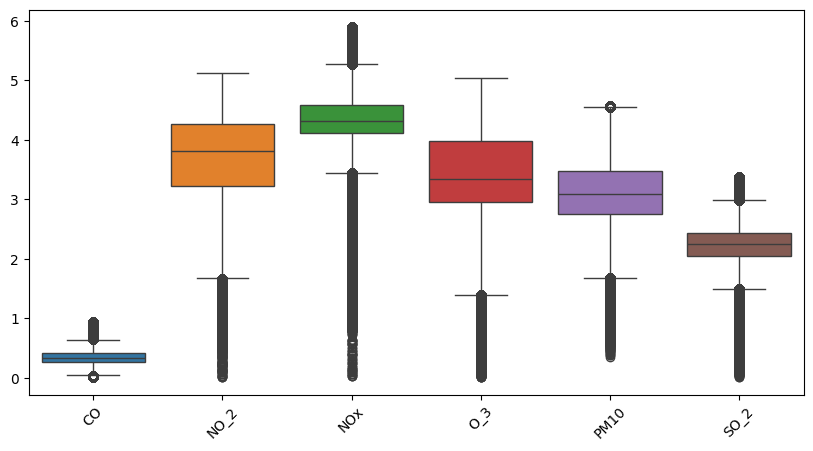

In [16]:
print(df.isnull().sum())
print(df.head())
print(df.shape)
pollutant_cols = ['CO','NO_2','NOx','O_3','PM10','SO_2']
plt.figure(figsize=(10,5))
sns.boxplot(data=df[pollutant_cols])
plt.xticks(rotation=45)
plt.show

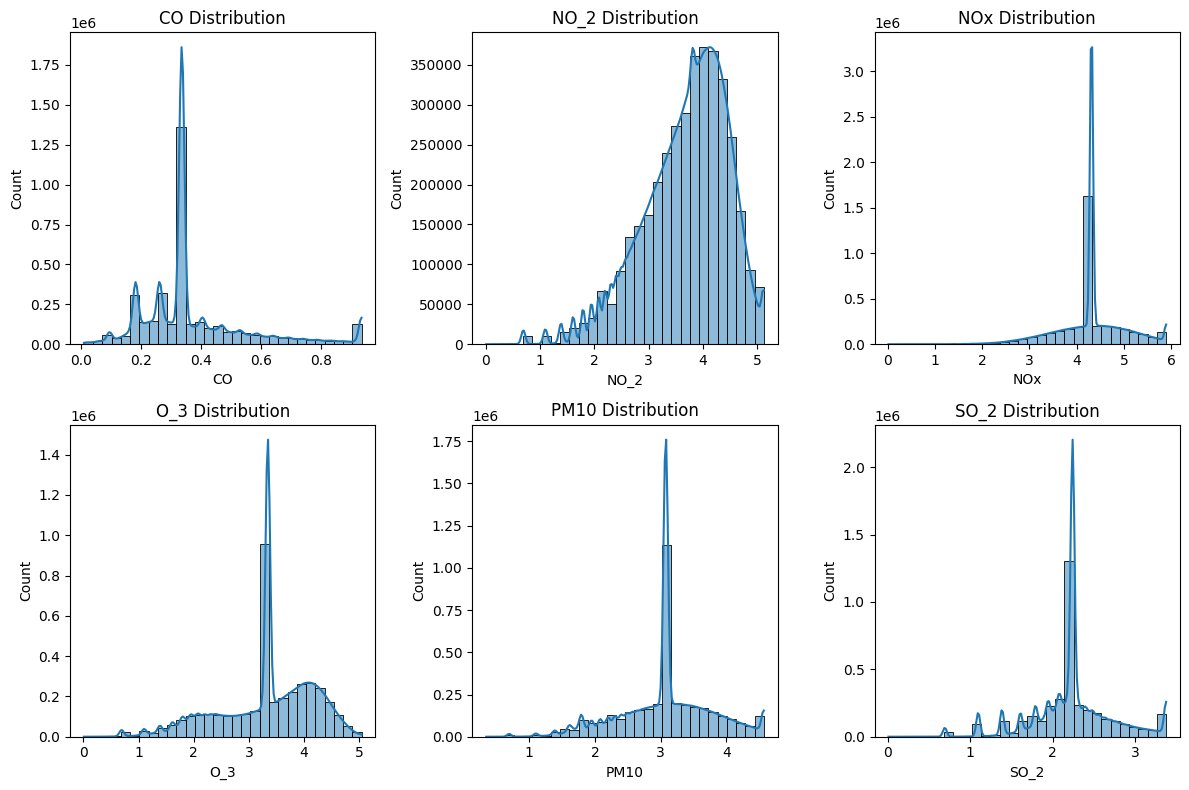

In [17]:

plt.figure(figsize=(12,8))
i = 1 

for col in pollutant_cols:
    plt.subplot(2, 3, i) 
    sns.histplot(df[col], kde=True, bins=30)  
    plt.title(f"{col} Distribution")
    i += 1 

plt.tight_layout()
plt.show()

In [18]:
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())
master_data=df

862972
0


In [19]:
# station-level representation
station_summary = df.groupby("station_id").agg(
    mean_PM10=("PM10", "mean"),
    median_PM10=("PM10", "median"),         #tell us the typical pollution level & variability of that station.
    std_PM10=("PM10", "std"),
    min_PM10=("PM10", "min"),
    max_PM10=("PM10", "max"),
    p10_PM10=("PM10", lambda x: x.quantile(0.1)), 
    p90_PM10=("PM10", lambda x: x.quantile(0.9)),
    sample_count_PM10=("PM10", "count")
).reset_index()
station_summary.head()

,station_id,mean_PM10,median_PM10,std_PM10,min_PM10,max_PM10,p10_PM10,p90_PM10,sample_count_PM10
0,/28079001,3.388127,3.469168,0.728665,0.570980,4.569543,2.362739,4.300410,71576
1,/28079003,3.188237,3.130263,0.729163,0.385262,4.569543,2.150599,4.144293,86548
2,/28079004,3.084871,3.076717,0.717091,0.615186,4.569543,2.030776,4.059581,100327
3,/28079006,3.421627,3.493169,0.713187,0.559616,4.569543,2.435366,4.320510,74644
4,/28079007,3.166171,3.220075,0.763741,0.542324,4.569543,2.064328,4.142658,75896


In [20]:
q1 = station_summary["median_PM10"].quantile(0.33)
q2 = station_summary["median_PM10"].quantile(0.66)

def pollution_flag(score):
    if score <= q1:
        return "very good"
    elif score <= q2:
        return "okay"
    else:
        return "bad"

station_summary["sensor_health"] = station_summary["median_PM10"].apply(pollution_flag)
station_summary.sample(10)

,station_id,mean_PM10,median_PM10,std_PM10,min_PM10,max_PM10,p10_PM10,p90_PM10,sample_count_PM10,sensor_health
20,/28079026,3.095050,3.124565,0.787572,0.598836,4.569543,1.964311,4.145354,61355,bad
36,/28079059,3.076717,3.076717,0.000000,3.076717,3.076717,3.076717,3.076717,21088,very good
10,/28079015,3.334844,3.389462,0.752262,0.398776,4.569543,2.263844,4.284827,67788,bad
13,/28079018,2.982086,3.034472,0.761659,0.587787,4.569543,1.945910,3.988373,147324,very good
21,/28079027,3.061415,3.076717,0.699299,0.570980,4.569543,2.054124,4.023063,83219,very good
35,/28079058,3.076717,3.076717,0.000000,3.076717,3.076717,3.076717,3.076717,20866,very good
31,/28079054,3.076717,3.076717,0.000000,3.076717,3.076717,3.076717,3.076717,22483,very good
4,/28079007,3.166171,3.220075,0.763741,0.542324,4.569543,2.064328,4.142658,75896,bad
25,/28079039,3.148616,3.076717,0.701479,0.587787,4.569543,2.177022,4.162937,109498,very good
15,/28079021,3.055342,3.104587,0.784436,0.559616,4.569543,1.897620,4.069369,77124,okay


In [21]:
df.sample(6)

,CO,NO_2,NOx,O_3,PM10,SO_2,station_id
1801837,0.198851,3.600048,3.793014,4.249780,2.978586,2.454447,/28079024
1810316,0.231112,1.922788,2.154085,4.509210,2.342767,2.055405,/28079024
1244848,0.215111,3.045950,3.144152,4.713127,3.111736,2.248129,/28079017
365872,0.357674,4.142023,4.798267,3.899343,3.359333,2.404239,/28079006
1464472,0.182322,2.943913,3.152309,4.565493,2.520113,2.369309,/28079018
49180,0.371564,3.920190,4.551242,2.514465,3.406848,2.611539,/28079001


In [22]:
df.describe()

,CO,NO_2,NOx,O_3,PM10,SO_2
count,2.938798e+06,2.938798e+06,2.938798e+06,2.938798e+06,2.938798e+06,2.938798e+06
mean,3.901905e-01,3.812442e+00,4.315729e+00,3.305472e+00,3.124490e+00,2.283588e+00
std,2.006946e-01,7.135502e-01,7.743855e-01,8.847076e-01,7.367176e-01,5.134429e-01
min,9.950331e-03,9.950331e-03,1.980263e-02,9.950331e-03,3.435897e-01,9.950331e-03
25%,2.623643e-01,3.401197e+00,3.896097e+00,2.720637e+00,2.708050e+00,2.017566e+00
50%,3.364722e-01,3.927109e+00,4.312704e+00,3.342116e+00,3.076717e+00,2.242529e+00
75%,4.700036e-01,4.330339e+00,4.789157e+00,3.990279e+00,3.621136e+00,2.558002e+00
max,9.360934e-01,5.118114e+00,5.890843e+00,5.040388e+00,4.569543e+00,3.377075e+00


In [23]:
#Feature Enginnering